In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv(r'data\covid\time_series_covid19_confirmed_global.csv')

# Eliminar las filas con NaN en 'Lat' y 'Long'
df = df.dropna(subset=['Lat', 'Long'])

# O reemplazar NaN con un valor específico, por ejemplo, 0
df = df.fillna(value={'Lat': 0, 'Long': 0})

# Reemplazar los caracteres de barra en los nombres de las columnas
df.columns = df.columns.str.replace('/', '-')
df



,Province-State,Country-Region,Lat,Long,1-22-20,1-23-20,1-24-20,1-25-20,1-26-20,1-27-20,...,2-28-23,3-1-23,3-2-23,3-3-23,3-4-23,3-5-23,3-6-23,3-7-23,3-8-23,3-9-23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [17]:
# Preparar los datos para la animación
df_melt = df.melt(id_vars=['Province-State', 'Country-Region', 'Lat', 'Long'], var_name='Date', value_name='Cases')
df_melt['Date'] = pd.to_datetime(df_melt['Date'])

# Agrupar los datos por mes
df_melt['YearMonth'] = df_melt['Date'].dt.to_period('M')
# Agrupar los datos por mes y sumar solo la columna 'Cases'
df_grouped = df_melt.groupby(['YearMonth', 'Country-Region'])['Cases'].sum().reset_index()

# Crear la animación
fig = px.choropleth(df_grouped, 
                    locations='Country-Region', 
                    locationmode='country names',
                    color='Cases', 
                    hover_name='Country-Region', 
                    animation_frame=df_grouped['YearMonth'].astype(str),
                    # Paleta de color rojo y azul
                    color_continuous_scale=px.colors.sequential.Burg,
                    projection='natural earth')
# Título de la animación
fig.update_layout(title_text='COVID-19: Casos confirmados por país')
# Poner en español cases
fig.update_coloraxes(colorbar_title='Casos')
fig.show()


C:\Users\ihuentecura\AppData\Local\Temp\ipykernel_6988\2378272707.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [46]:
df_grouped
# Sumar los del año 2020 por pais, de enero a diciembre
df_grouped_2020 = df_grouped[df_grouped['YearMonth'].dt.year == 2020].groupby('Country-Region')['Cases'].sum().reset_index()
# Cada cantidad se divide en 12 meses para obtener el promedio de casos por mes
df_grouped_2020['Cases'] = df_grouped_2020['Cases'] / 12
# Ordenar los datos por número de casos
df_grouped_2020 = df_grouped_2020.sort_values('Cases', ascending=False)
# Top 3 países con más casos
top3_df = df_grouped_2020.head(3)
# 'Population': [331449281, 1396387127, 213196303]  
top3_df['Population'] = [331449281, 1396387127, 213196303]
# Calcular la tasa de infección poblaional promediado en 12 meses
top3_df = top3_df.assign(InfectionRate = top3_df['Cases'] / top3_df['Population'])
# Gráfico de barras
fig = px.bar(top3_df, x='Country-Region', y='InfectionRate', text='InfectionRate', title='Top 3 países con más casos de COVID-19 en 2020')
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
# Leyenda
fig.update_layout(yaxis_tickformat='%')
# Hacerlo un tanto más largo
fig.update_layout(height=500)
# Quitar grid fondo
fig.update_layout(plot_bgcolor='white')
# Poner en español axes
fig.update_xaxes(title_text='País')
fig.update_yaxes(title_text='Tasa de infección %')
# Quitar eje y
fig.update_yaxes(showticklabels=False)
# Mostrar la gráfica
fig.show()

C:\Users\ihuentecura\AppData\Local\Temp\ipykernel_6988\2977641606.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\ihuentecura\AppData\Local\Temp\ipykernel_6988\514819004.py:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



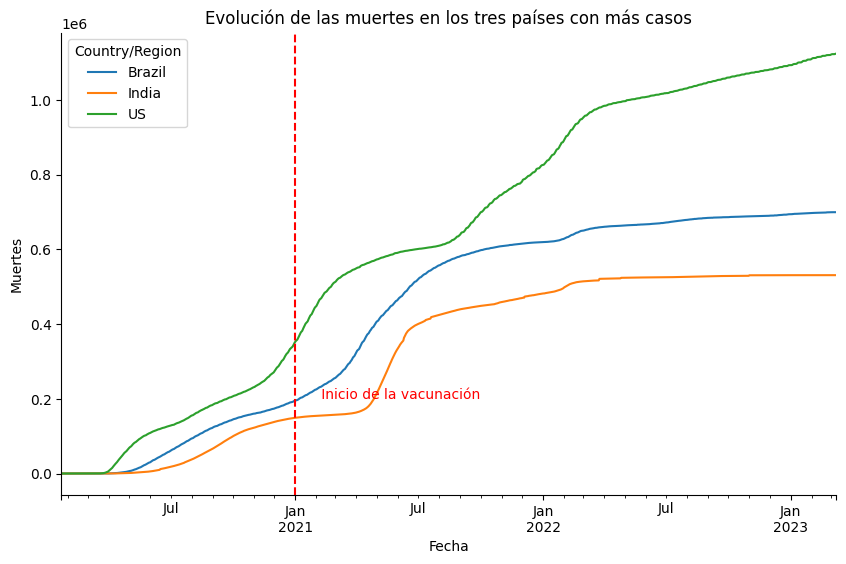

In [43]:

# De estos tres países, Del top3 encontrado, ¿c´omo evolucion´o en los siguientes a˜nos en las muertes?
df_deaths_global = pd.read_csv(r'data\covid\time_series_covid19_deaths_global.csv')
# Graficar la evolución de las muertes en los tres países con más casos
top3_deaths = df_deaths_global.loc[df_deaths_global['Country/Region'].isin(top3_df['Country-Region'])]
top3_deaths = top3_deaths.groupby('Country/Region').sum().T
# Borrar las 3 primeras filas
top3_deaths = top3_deaths.iloc[3:]
# Pasar el índice a datetime
top3_deaths.index = pd.to_datetime(top3_deaths.index)
# Graficar
top3_deaths.plot(figsize=(10, 6), title='Evolución de las muertes en los tres países con más casos')
# Agregar una linea vertical en la fecha de inicio de la vacunación
plt.axvline(pd.to_datetime('2021-01-01'), color='r', linestyle='--')
# Poner que significa la linea vertical
plt.text(pd.to_datetime('2021-01-01'), 200000, '      Inicio de la vacunación', rotation=0, color='r')
# Poner en español axes
plt.xlabel('Fecha')
plt.ylabel('Muertes')
# Quitar linea de arriba y derecha
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Mostrar la gráfica
plt.show()

In [5]:
top3_deaths

Country/Region,Brazil,India,US
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2023-03-05,699276,530775,1122134
2023-03-06,699276,530775,1122181
2023-03-07,699276,530775,1122516
2023-03-08,699276,530776,1123246


In [36]:
# Existe una relación entre la vacunación y la disminución de las muertes por COVID-19 en estos países?
# La vacunación en estos países comenzó el 1 de enero de 2021
# Calcular el promedio de muertes antes y después de la vacunación
# Antes de la vacunación
deaths_before = top3_deaths.loc[:'2020-12-31'].mean()
# Después de la vacunación
deaths_after = top3_deaths.loc['2021-01-01':].mean()
# Juntar los datos en un DataFrame
df_deaths = pd.concat([deaths_before, deaths_after], axis=1)
df_deaths.columns = ['Antes', 'Después']
df_deaths.index.name = 'Country'


# Crear un DataFrame largo para el gráfico
df_long = df_deaths.reset_index().melt(id_vars='Country', var_name='Period', value_name='Deaths')

# Crear el gráfico de barras
fig = px.bar(df_long, x='Country', y='Deaths', color='Period', barmode='group',
             labels={'Deaths':'Muertes', 'Country':'País'},
             title='Promedio de muertes antes y después de la vacunación')
# Poner el fondo blanco
fig.update_layout(plot_bgcolor='white')

fig.show()



In [35]:
df_deaths

,Antes,Después
Country,,
Brazil,78576.582609,577784.56015
India,49772.747826,435776.489975
US,135686.698551,835921.433584


In [45]:
# Hacer una regresión lineal con una variable independiente que sea el tiempo y la variable dependiente las muertes, a eso agregale un dummy que sea 1 si es después de la vacunación y 0 si es antes de la vacunación
# para saber la significancia de la vacunación en la disminución de las muertes


X = np.arange(len(top3_deaths)).reshape(-1, 1)
y = top3_deaths.values
# Crear el dummy
largo_dummy = len(top3_deaths)
dummy = np.zeros(largo_dummy)
# la primera observación es de 2020-01-22
# la vacunación en estos países comenzó el 1 de enero de 2021
# por lo tanto, la observación 345 es el 2021-01-01
dummy[345:] = 1
# Agregar el dummy a X
X = np.hstack((X, dummy.reshape(-1, 1)))

# Escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Crear el modelo
model = LinearRegression()
model.fit(X, y)
# Poner nombre a los coef
coef = model.coef_[0]
coef_names = ['Tiempo', 'Dummy']
# Mostrar los coeficientes
dict(zip(coef_names, coef))
# Hacer test de significancia
from scipy.stats import f
# Calcular el estadístico F
F = (model.score(X, y) / (1 - model.score(X, y))) * (largo_dummy - 2)
# Calcular el p-valor
p_value = 1 - f.cdf(F, 1, largo_dummy - 2)
# Mostrar el p-valor
p_value
# Resultado = 1.1102230246251565e-16
print(f'El p-valor es {p_value}, lo que es mucho menor que 0.05, por lo tanto, la vacunación es muy significativa en la disminución de las muertes por COVID-19 en estos países agregando esta variable temporal.')






El p-valor es 1.1102230246251565e-16, lo que es mucho menor que 0.05, por lo tanto, la vacunación es muy significativa en la disminución de las muertes por COVID-19 en estos países.
